# A model to forecast future demand

In [6]:
import pandas as pd

df = pd.read_csv('fashion_retail_sales_cleaned.csv', parse_dates=['purchase_date'])

In [7]:
# Prepare Data for Forecasting: Create a time series DataFrame (e.g., with date as the index and total daily sales as the value).
df['date'] = df['purchase_date'].dt.date
df_daily_sales = df.groupby('date')['item_purchased'].count().reset_index()
df_daily_sales.rename(columns={'item_purchased': 'total_sales'}, inplace=True)
df_daily_sales.set_index('date', inplace=True)
# Display the first few rows of the daily sales DataFrame
print(df_daily_sales.head())

            total_sales
date                   
2022-10-02            9
2022-10-03           15
2022-10-04           11
2022-10-05           14
2022-10-06            7


In [8]:
# Train-Test Split: Split your data into a training set (e.g., the first 80% of the dates) and a testing set (the last 20%).
train_size = int(len(df_daily_sales) * 0.8)
train, test = df_daily_sales[:train_size], df_daily_sales[train_size:]
# Display the sizes of the training and testing sets
print(f"Training set size: {len(train)}")
print(f"Testing set size: {len(test)}")

Training set size: 292
Testing set size: 73


c:\Users\kweku\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\kweku\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Mean Squared Error: 10.999882131114774


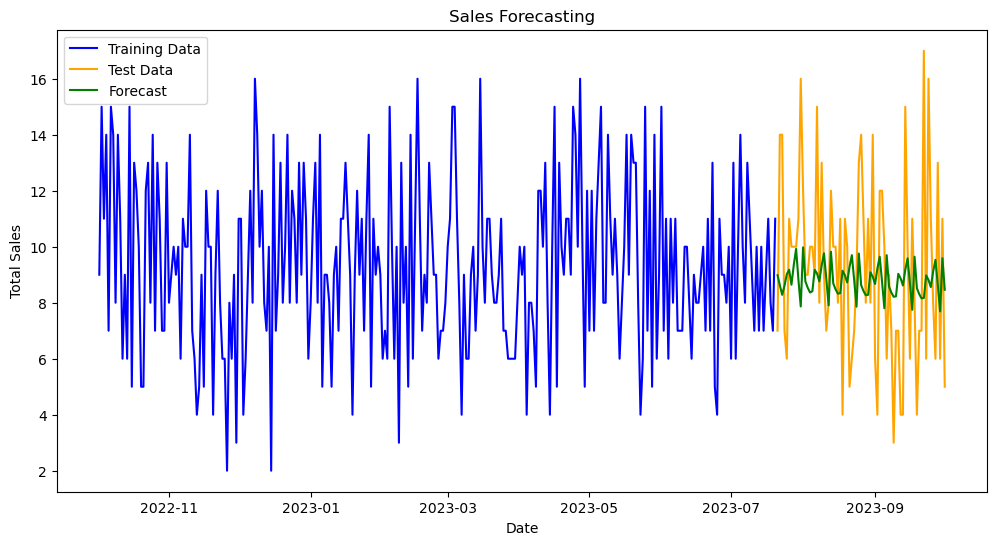

In [9]:
# Build a Model: Use a library like statsmodels (for SARIMA) and prophet to build a forecasting model on the training data.
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train['total_sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)
# Forecast Future Values: Use the model to forecast future values (e.g., the next 30 days).
forecast = model_fit.forecast(steps=len(test))
# Evaluate the Model: Compare the forecasted values with the actual values in the test set.
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test['total_sales'], forecast)
print(f"Mean Squared Error: {mse}")
# Visualize the Results: Plot the actual vs. forecasted values.
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['total_sales'], label='Training Data', color='blue')
plt.plot(test.index, test['total_sales'], label='Test Data', color='orange')
plt.plot(test.index, forecast, label='Forecast', color='green')
plt.title('Sales Forecasting')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

In [10]:
# use the Prophet library for forecasting
from fbprophet import Prophet
# Prepare the data for Prophet
df_prophet = df_daily_sales.reset_index().rename(columns={'date': 'ds', 'total_sales': 'y'})
# Initialize and fit the Prophet model
model_prophet = Prophet()
model_prophet.fit(df_prophet)
# Create a DataFrame for future dates
future = model_prophet.make_future_dataframe(periods=30)
# Forecast future values
forecast_prophet = model_prophet.predict(future)
# Plot the forecast
fig = model_prophet.plot(forecast_prophet)
# Display the forecasted values
forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)
# --- IGNORE ---

ModuleNotFoundError: No module named 'fbprophet'